In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/RtmSimulation_kickstart.csv', index_col= 0)

In [4]:
df.head()

,lai,wetness,treeSpecies,Sentinel_2A_492.4,Sentinel_2A_559.8,Sentinel_2A_664.6,Sentinel_2A_704.1,Sentinel_2A_740.5,Sentinel_2A_782.8,Sentinel_2A_832.8,...,w2491,w2492,w2493,w2494,w2495,w2496,w2497,w2498,w2499,w2500
id,,,,,,,,,,,,,,,,,,,,,
1,5.10,0.36,predominantly_pine,0.062092,0.131702,0.043197,0.177134,0.401750,0.458003,0.463287,...,0.037392,0.026100,0.033480,0.027219,0.033905,0.017797,0.038259,0.020111,0.027921,0.027520
2,5.34,0.47,predominantly_beech,0.052807,0.129987,0.043061,0.153641,0.407523,0.466853,0.477236,...,0.028002,0.030901,0.039650,0.029524,0.032461,0.030735,0.023527,0.029523,0.021542,0.026780
3,4.53,0.68,predominantly_pine,0.047937,0.139421,0.045780,0.157121,0.395428,0.441620,0.448626,...,0.015169,0.020155,0.025696,0.026504,0.028994,0.031195,0.025666,0.032225,0.016128,0.026495
4,2.10,0.80,predominantly_beech,0.045907,0.107761,0.033984,0.128237,0.341315,0.385277,0.382241,...,0.029487,0.031408,0.032888,0.029878,0.027617,0.034964,0.031996,0.032882,0.019543,0.121085
5,5.34,0.48,mixed,0.051712,0.136293,0.041502,0.167564,0.407460,0.454137,0.464966,...,0.024510,0.023754,0.026276,0.031367,0.039625,0.036997,0.022577,0.039619,0.031636,0.022230


## Description and stats

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Columns: 2114 entries, lai to w2500
dtypes: float64(2113), object(1)
memory usage: 16.1+ MB


In [6]:
df.columns

Index(['lai', 'wetness', 'treeSpecies', 'Sentinel_2A_492.4',
       'Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       ...
       'w2491', 'w2492', 'w2493', 'w2494', 'w2495', 'w2496', 'w2497', 'w2498',
       'w2499', 'w2500'],
      dtype='object', length=2114)

In [7]:
df.columns[4:14]

Index(['Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4',
       'w400'],
      dtype='object')

## Value Distributions

<Axes: ylabel='Frequency'>

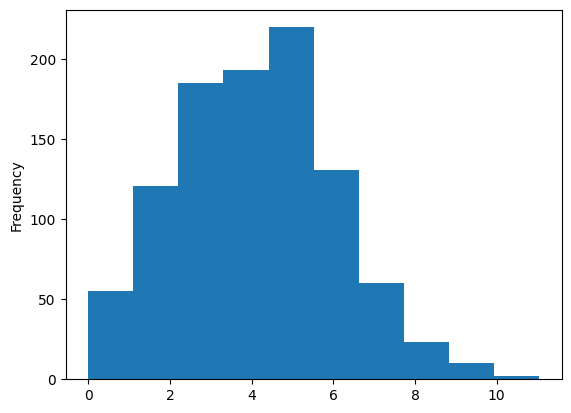

In [8]:
df['lai'].plot.hist()

In [9]:
df['ForestType'] = ''
df.loc[df['lai'] <= 1,'ForestType' ] = 'woodLands'
df.loc[(df['lai'] > 1) & (df['lai'] <= 2),'ForestType'] = 'openForest'
df.loc[(df['lai'] > 2) & (df['lai'] <= 4),'ForestType']  = 'moderateDenseForest'
df.loc[(df['lai'] > 4) & (df['lai'] <= 6),'ForestType']  = 'denseForest'
df.loc[df['lai'] >= 6,'ForestType' ] = 'veryDenseForest'

<Axes: ylabel='Frequency'>

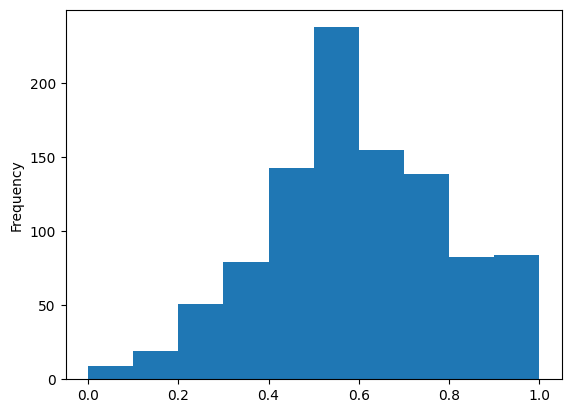

In [10]:
df['wetness'].plot.hist()

In [11]:
df['treeSpecies'].value_counts()

treeSpecies
mixed                  392
predominantly_pine     258
predominantly_beech    229
pine                    63
beech                   58
Name: count, dtype: int64

#### Sentinel direct measurements

<Axes: ylabel='id'>

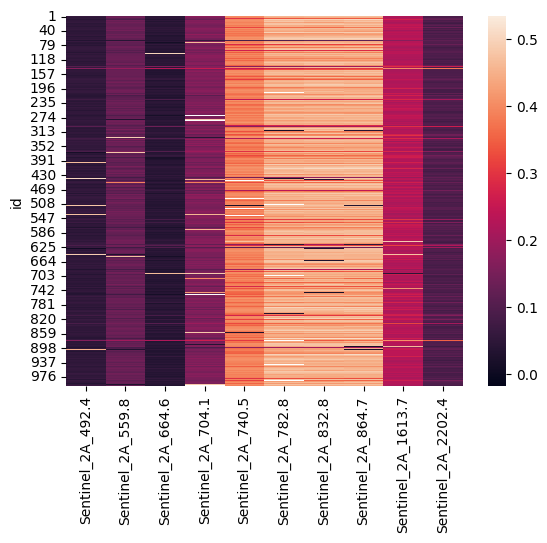

In [12]:
sns.heatmap(df.iloc[:,3:13])

### Complete reflection

<Axes: ylabel='id'>

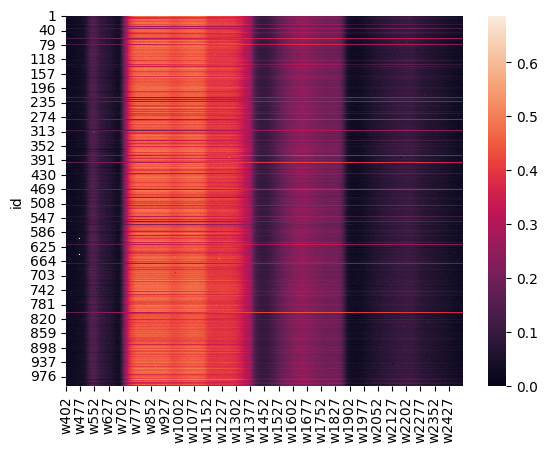

In [13]:
sns.heatmap(df.iloc[:,15:-1])

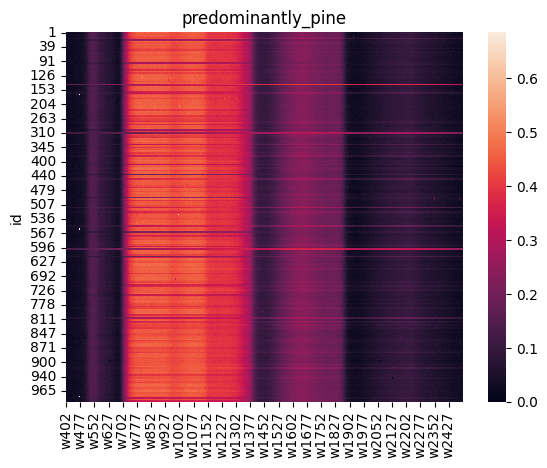

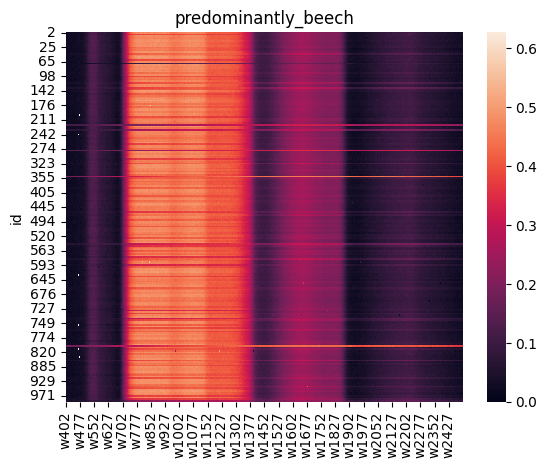

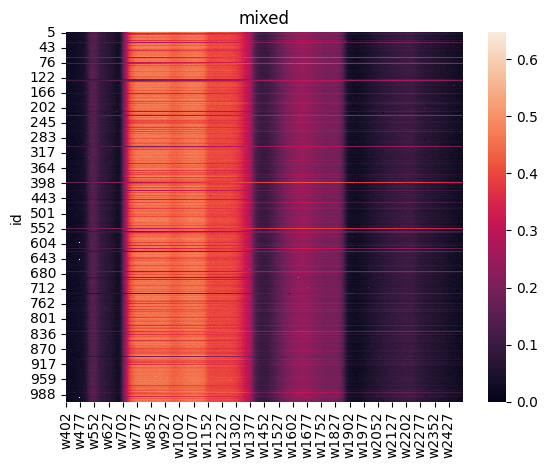

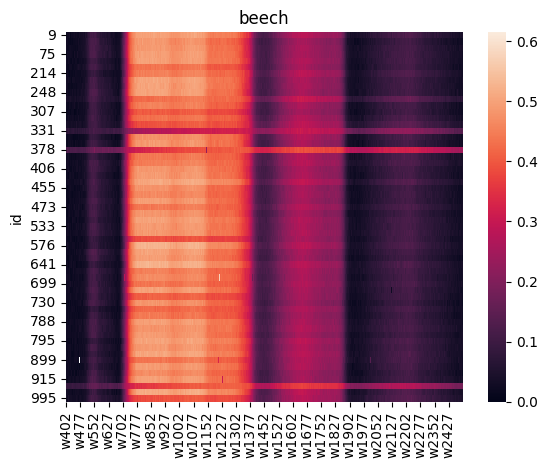

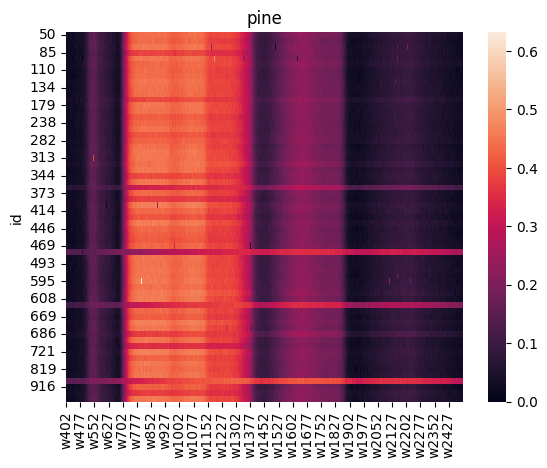

In [20]:
# plot heatmap per tree species
for species in df['treeSpecies'].unique():
    sns.heatmap(df[df['treeSpecies'] == species].iloc[:,15:-1])
    plt.title(species)
    plt.show()

In [ ]:
#show the curve with biggest difference to avg curve


In [14]:
# show the ids with least variance accross the columns
df


id
728    0.002187
66     0.002343
626    0.002463
136    0.003128
298    0.003149
dtype: float64

<Axes: ylabel='802'>

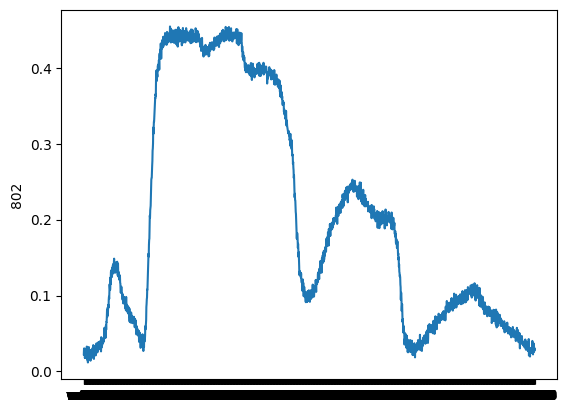

In [19]:
sns.lineplot(df.iloc[801,15:-1])

<Axes: ylabel='803'>

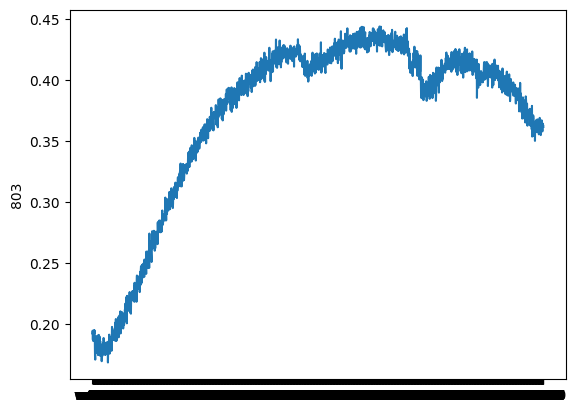

In [18]:
sns.lineplot(df.iloc[802,15:-1])

KeyboardInterrupt: 

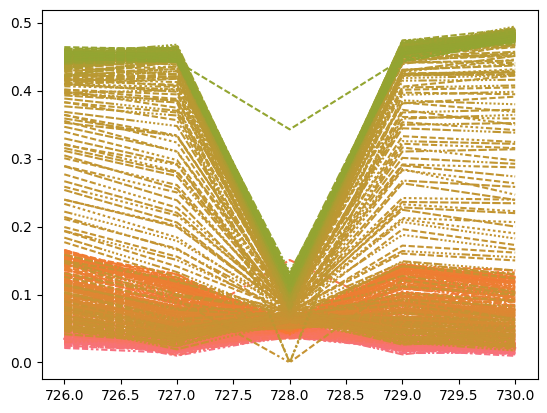

In [16]:
sns.lineplot(df.iloc[725:730,15:-1])

## Correlations

### With Sentinel measurements

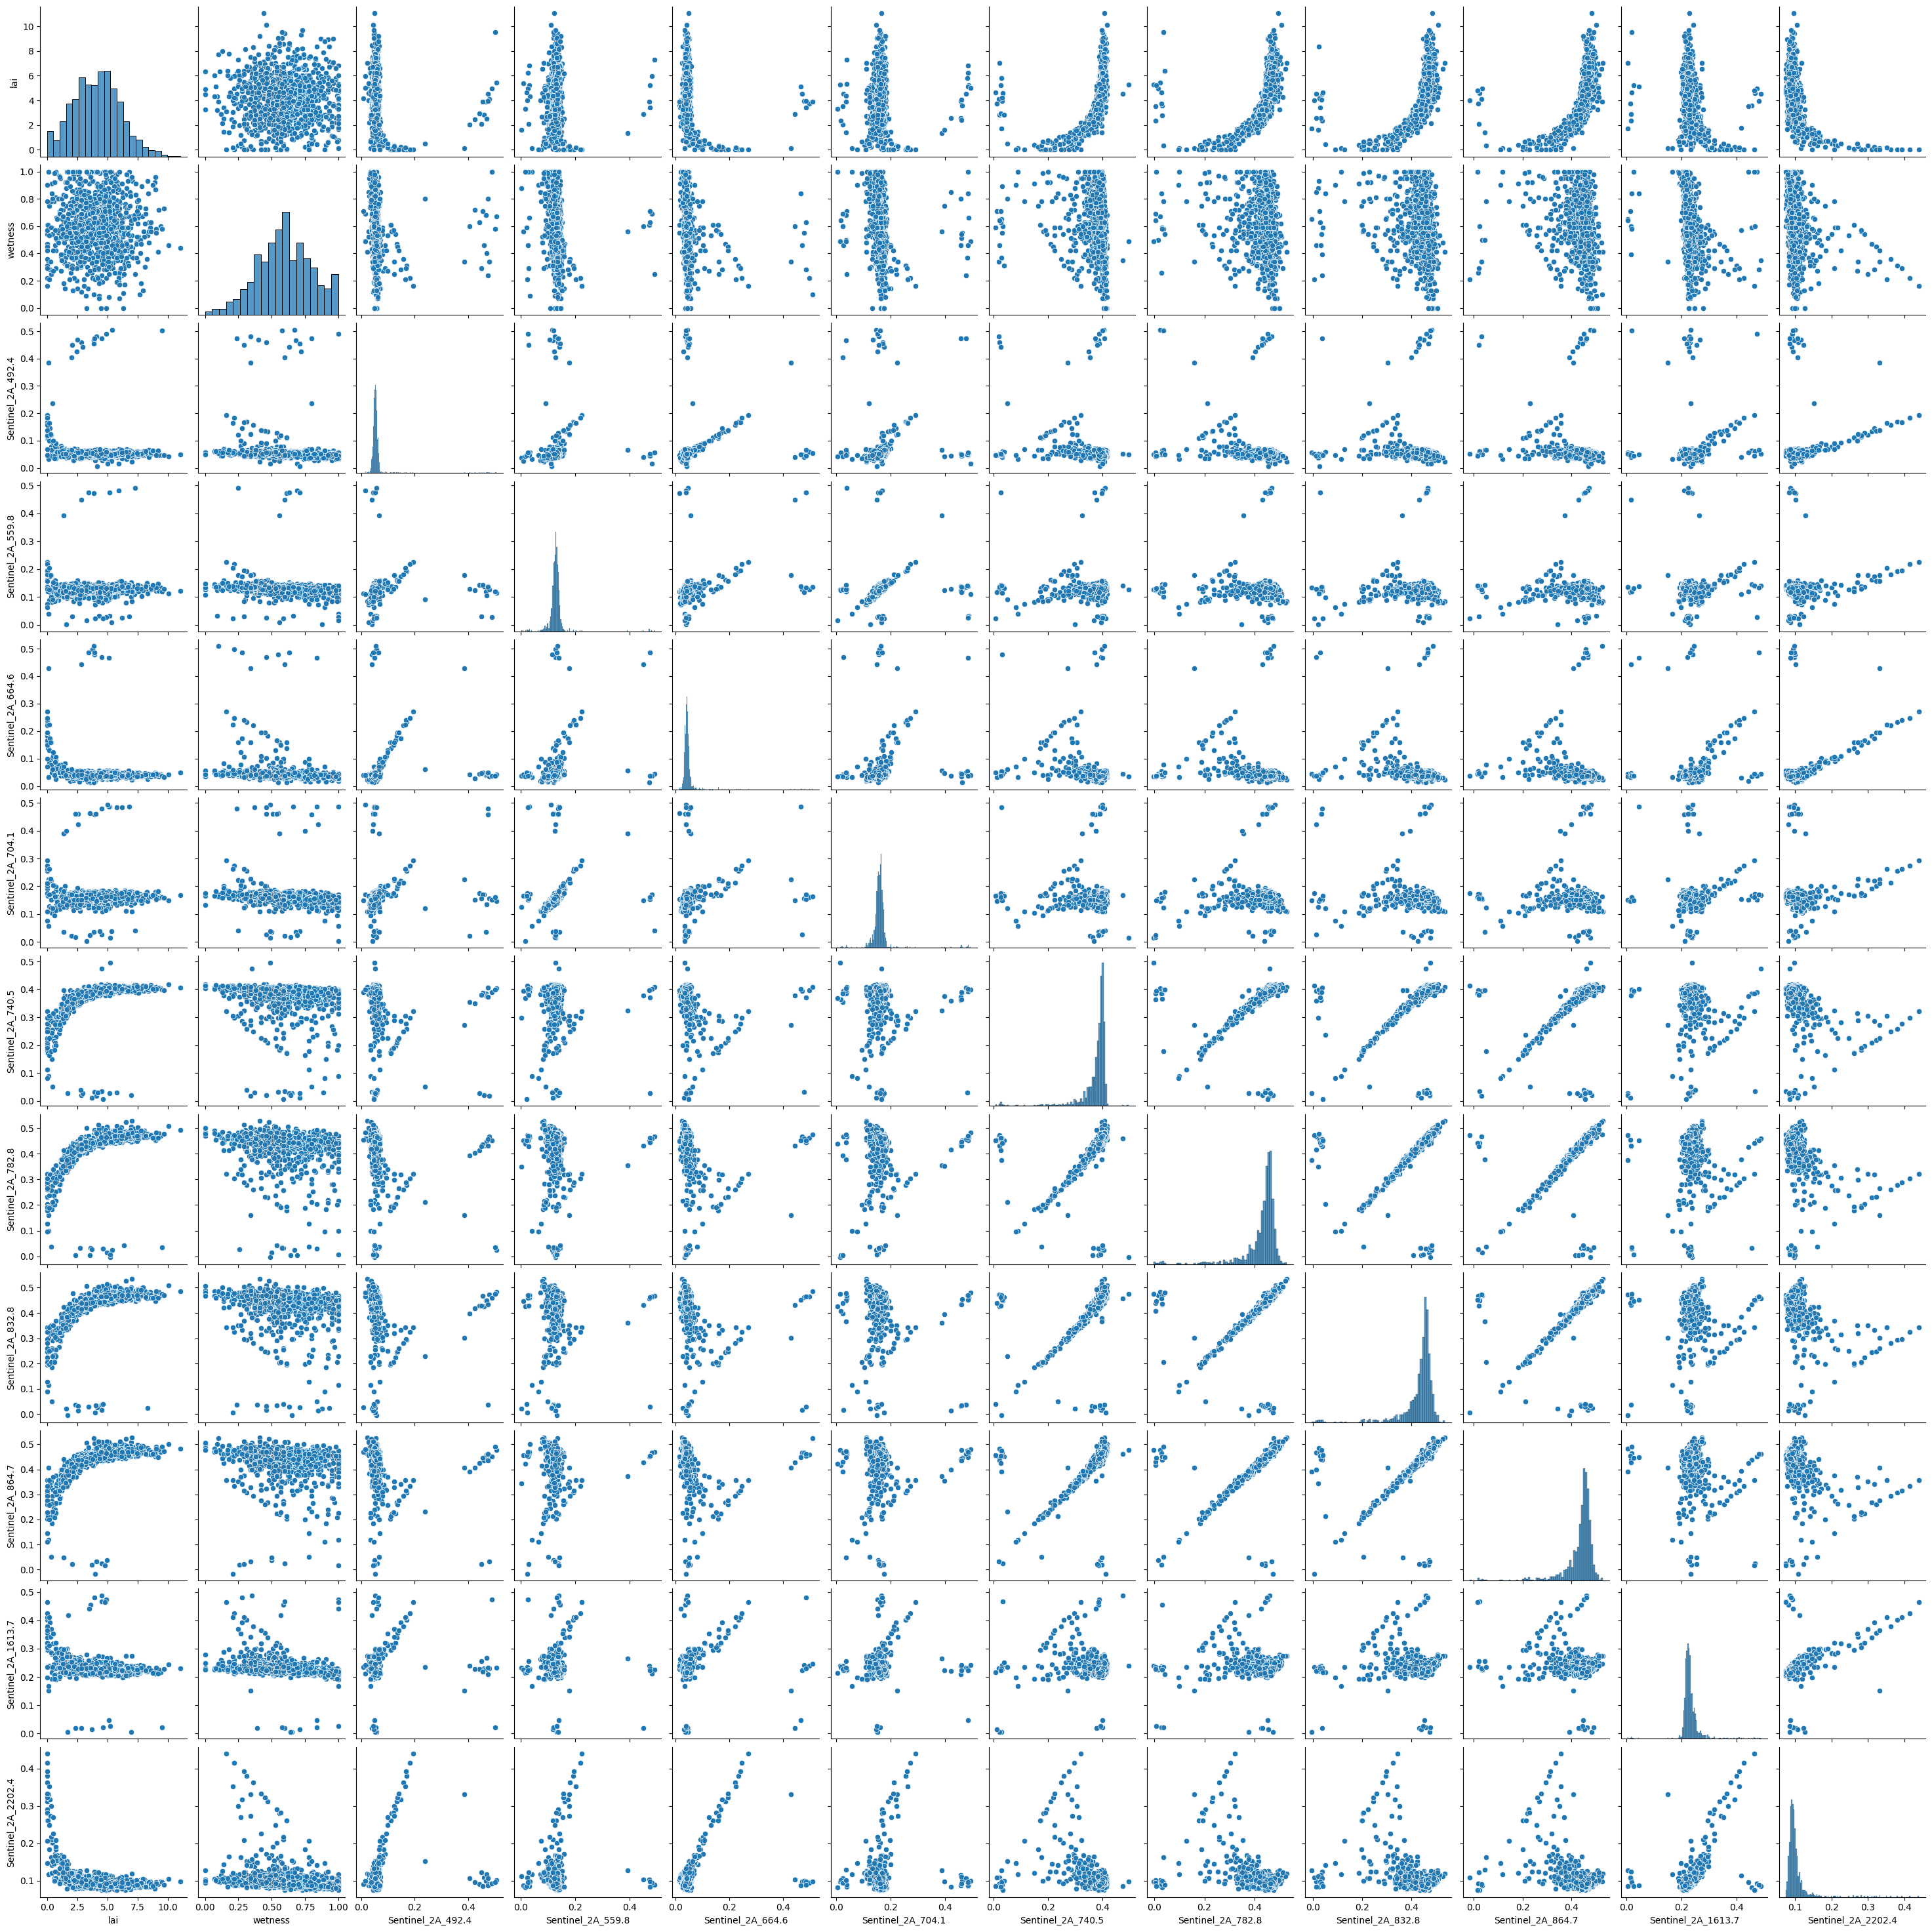

In [14]:
sns.pairplot(df.iloc[:,0:13].drop('treeSpecies', axis = 1))

<Axes: >

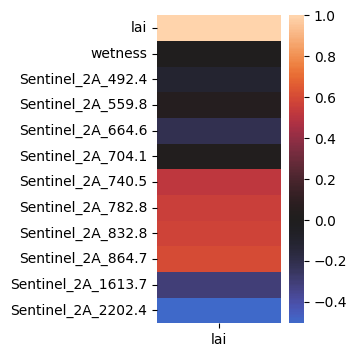

In [15]:
plt.figure(figsize = (2,4))
sns.heatmap(df.iloc[:,0:13].drop('treeSpecies', axis = 1).corr()['lai'].to_frame(), center = 0)

### With reflection values

In [16]:
plt.figure(figsize = (3,20))
sns.heatmap(df.drop(['treeSpecies', 'ForestType'], axis = 1).corr()['lai'].to_frame(), cmap = 'icefire', center = 0)

KeyboardInterrupt: 

<Figure size 300x2000 with 0 Axes>

### Reflection curves

<Axes: >

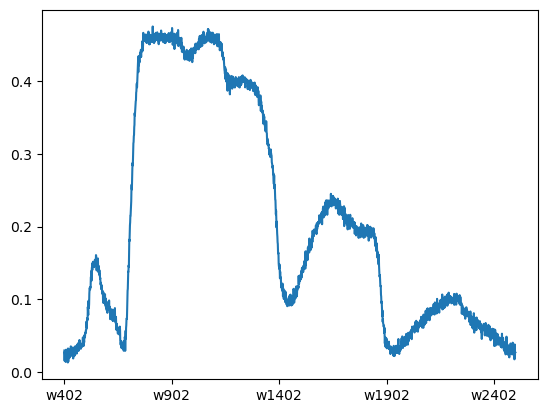

In [ ]:
df.iloc[0,15:-1].plot()

<Axes: >

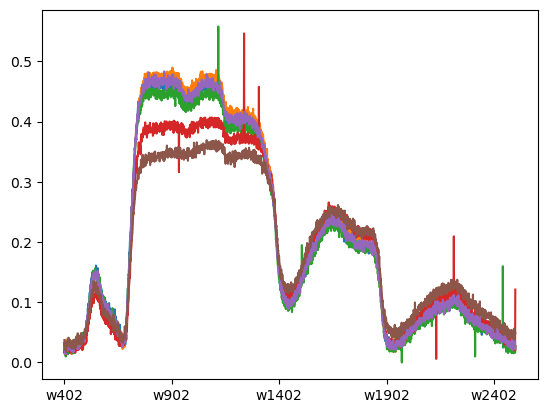

In [ ]:
df.iloc[0,15:-1].plot()
df.iloc[1,15:-1].plot()
df.iloc[2,15:-1].plot()
df.iloc[3,15:-1].plot()
df.iloc[4,15:-1].plot()
df.iloc[5,15:-1].plot()

#### All curves

In [ ]:
df = df.reset_index().rename(columns = {'index':'id'})

In [ ]:
df_long = pd.wide_to_long(df.dropna(), stubnames='w', i = 'id' , j = 'wavelength').reset_index()
df_long.set_index('id', inplace = True)
df_long.rename(columns={'w':'reflection'}, inplace= True)
df_long

,wavelength,Sentinel_2A_740.5,Sentinel_2A_782.8,Sentinel_2A_664.6,Sentinel_2A_864.7,Sentinel_2A_559.8,Sentinel_2A_2202.4,wetness,Sentinel_2A_492.4,ForestType,Sentinel_2A_832.8,lai,Sentinel_2A_1613.7,treeSpecies,Sentinel_2A_704.1,reflection
id,,,,,,,,,,,,,,,,
1,400,0.401750,0.458003,0.043197,0.465697,0.131702,0.094398,0.36,0.062092,denseForest,0.463287,5.10,0.224946,predominantly_pine,0.177134,0.022230
2,400,0.407523,0.466853,0.043061,0.469157,0.129987,0.096956,0.47,0.052807,denseForest,0.477236,5.34,0.228034,predominantly_beech,0.153641,0.024134
3,400,0.395428,0.441620,0.045780,0.448503,0.139421,0.090629,0.68,0.047937,denseForest,0.448626,4.53,0.215900,predominantly_pine,0.157121,0.024915
4,400,0.341315,0.385277,0.033984,0.380013,0.107761,0.105857,0.80,0.045907,moderateDenseForest,0.382241,2.10,0.241785,predominantly_beech,0.128237,0.034277
5,400,0.407460,0.454137,0.041502,0.459594,0.136293,0.085389,0.48,0.051712,denseForest,0.464966,5.34,0.220666,mixed,0.167564,0.024460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2500,0.328274,0.375413,0.037658,0.392163,0.101292,0.133181,0.60,0.047153,openForest,0.385352,1.66,0.271863,beech,0.133554,0.037879
996,2500,0.400706,0.471003,0.036994,0.468834,0.025300,0.096436,0.46,0.055358,veryDenseForest,0.469821,6.23,0.223149,mixed,0.484043,0.029702
997,2500,0.388046,0.445944,0.034888,0.457702,0.129982,0.084067,0.92,0.047907,denseForest,0.458192,5.32,0.205654,mixed,0.163465,0.010467


In [ ]:
sns.lineplot(data = df_long, x = 'wavelength', y = 'reflection', hue = 'ForestType')
sns.despine()
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0)